In [1]:
import os
from label_data_utilities import *
from rating_data_utilities import *
from timing_data_utilities import *
from data_utilities import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 2000)

# Experiment data and labels directories
data_dir = os.path.join('..', 'static', 'data')
user_data_dir = os.path.join(data_dir, 'user_dialogues')
labels_dir = os.path.join(data_dir, 'labels')

# Processed data and label data directories
results_dir = 'results'
label_data_dir = 'label_data'

# Paths to label agreement, timing and confidence rating data
agreement_data_dir = os.path.join(results_dir, 'agreement_data')
post_fix_agreement_data_dir = os.path.join(results_dir, 'agreement_data', 'postfix_only')
timing_data_dir = os.path.join(results_dir, 'timing_data')
rating_data_dir = os.path.join(results_dir, 'rating_data')
distr_data_dir = os.path.join(results_dir, 'distribution_data')

# Load the user data and labels
user_data = load_user_data(user_data_dir)
labels = load_labels(labels_dir, user_data)

# List of sets
sets_list = ['set_1', 'set_2', 'set_3', 'set_4', 'set_5']

# Lists of dialogue corpora and groups
dialogue_groups = dict()
dialogue_groups['practice_dialogue'] = ['practice']
dialogue_groups['kvret_dialogues'] = ['test_28', 'test_52', 'test_96', 'test_129', 'test_102']
dialogue_groups['babl_dialogues'] = ['task1_test_290', 'task1_test_428', 'task1_test_555', 'task1_test_564', 'task1_test_894']
dialogue_groups['task-oriented_dialogues'] = dialogue_groups['kvret_dialogues'] + dialogue_groups['babl_dialogues']

dialogue_groups['scose_dialogues'] = ['jason-mammoth', 'jason-clone', 'jason-accident', 'lynne-hunter', 'lynne-tipsy']
dialogue_groups['cabnc_dialogues'] = ['KB7RE015', 'KBKRE03G', 'KDARE00G', 'KE2RE00Y', 'KBERE00G']
dialogue_groups['non-task-oriented_dialogues'] = dialogue_groups['scose_dialogues'] + dialogue_groups['cabnc_dialogues']

dialogue_type_groups = ['task-oriented_dialogues', 'non-task-oriented_dialogues']
dialogue_corpora_groups = ['kvret_dialogues', 'babl_dialogues', 'scose_dialogues', 'cabnc_dialogues']

# Get the user label data
user_label_data = get_user_label_data(os.path.join(agreement_data_dir, 'user_label_data.pkl'), user_data, labels, sets_list, dialogue_groups)
# If user confidence data has already been generated then load, else create it
user_rating_data = get_user_rating_data(os.path.join(rating_data_dir, 'rating_data.pkl'), user_data, sets_list, dialogue_groups)
# If user timing data has already been generated then load, else create it
user_timing_data = get_user_timing_data(os.path.join(timing_data_dir, 'timing_data.pkl'), user_data, sets_list, dialogue_groups)

# Inter-annotator Agreement

## Dialogue Sets

Alpha                          Beta                    
             da        ap   ap type        da        ap   ap type
set 1  0.478730  0.200428  0.346459  0.735833  0.601271  0.671347
set 2  0.324579  0.105461  0.221338  0.665965  0.560688  0.616175
set 3  0.442411  0.113238  0.268344  0.725819  0.583180  0.648784
set 4  0.518896  0.215649  0.361863  0.759626  0.605894  0.680232
set 5  0.585037  0.284086  0.438179  0.789259  0.648916  0.719561
mean   0.469931  0.183772  0.327237  0.735301  0.599990  0.667220

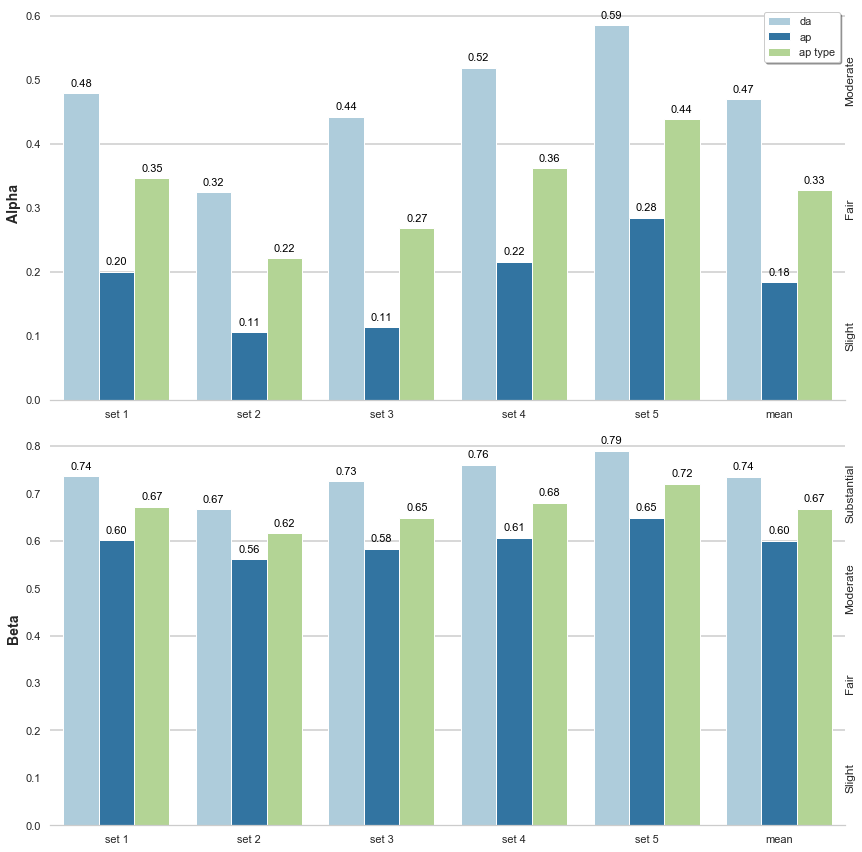

In [2]:
# Generate agreement values for each coefficient/dialogue set
set_frame, set_fig = generate_set_agreement_data(user_label_data['sets_labels'], labels, 'Dialogue Set Agreement', agreement_data_dir, save=False, show=False)
set_frame

### Label Type Stats

In [3]:
# Generate stats for each label type
label_type_frame = generate_label_type_agreement_statistics('Label Type Agreement Statistics', agreement_data_dir, save=False, show=False)
label_type_frame

Alpha                                                                                                                           Beta                                                                                                                    
    group1   group2 meandiff   p-value   lower   upper reject    eta_sq  omega_sq   cohen_f     n      exp_n     power exp_power   group1   group2 meandiff   p-value   lower   upper reject    eta_sq  omega_sq  cohen_f     n      exp_n    power exp_power
0       ap  ap type   0.1235  0.125300 -0.0263  0.2733  False       NaN       NaN       NaN   NaN        NaN       NaN       NaN       ap  ap type   0.0572  0.141400 -0.0144  0.1288  False       NaN       NaN      NaN   NaN        NaN      NaN       NaN
1       ap       da   0.2462  0.001000  0.0964  0.3960   True       NaN       NaN       NaN   NaN        NaN       NaN       NaN       ap       da   0.1153  0.001000  0.0438  0.1869   True       NaN       NaN      NaN   NaN        NaN      NaN       NaN
2  ap type       da   0.1227  0.128800 -0.0271  0.2724  False       NaN       NaN       NaN   NaN        NaN       NaN       NaN  ap type       da   0.0581  0.132800 -0.0134  0.1297  False       NaN       NaN      NaN   NaN        NaN      NaN       NaN
3      NaN      NaN      NaN  0.000998     NaN     NaN    NaN  0.215298  0.185215  0.260651  60.0  40.116816  0.941503       0.8      NaN      NaN      NaN  0.001262     NaN     NaN    NaN  0.208808  0.178568  0.25072  60.0  41.575281  0.93258       0.8

## Task-oriented and Non-task-oriented Dialogues

group     Alpha                          Beta                    
                                         da        ap   ap type        da        ap   ap type
test 28             task-oriented  0.802084  0.318182  0.555914  0.896084  0.652893  0.770496
test 52             task-oriented  0.370974  0.178571  0.279948  0.681300  0.590909  0.638156
test 96             task-oriented  0.595147  0.222826  0.410409  0.800023  0.606061  0.705012
test 129            task-oriented  0.830042  0.339806  0.581529  0.913304  0.703704  0.800355
test 102            task-oriented  0.851193  0.611765  0.731258  0.919106  0.789474  0.854090
task1 test 290      task-oriented  0.459638  0.057971  0.270529  0.728098  0.526042  0.632942
task1 test 428      task-oriented  0.604903  0.010989  0.322478  0.794510  0.540146  0.666431
task1 test 555      task-oriented  0.183561  0.012270  0.096574  0.585153  0.554264  0.568601
task1 test 564      task-oriented  0.407588  0.152866  0.281143  0.688921  0.577778  0.632288
task1 test 894      task-oriented  0.457207  0.350000  0.407518  0.711457  0.661458  0.688052
mean                task-oriented  0.556234  0.225525  0.393730  0.771796  0.620273  0.695642
jason-mammoth   non-task-oriented  0.218345  0.143294  0.183132  0.610514  0.585153  0.598442
jason-clone     non-task-oriented  0.056846 -0.018429  0.021640  0.543336  0.507772  0.526677
jason-accident  non-task-oriented  0.387984  0.050086  0.201280  0.709448  0.565375  0.628516
lynne-hunter    non-task-oriented  0.268430 -0.007827  0.122841  0.639293  0.501718  0.566887
lynne-tipsy     non-task-oriented  0.499457  0.201524  0.342842  0.743147  0.612845  0.672838
KB7RE015        non-task-oriented  0.415212  0.109208  0.267018  0.693881  0.536232  0.617337
KBKRE03G        non-task-oriented  0.295027  0.100962  0.200917  0.638889  0.531915  0.587445
KDARE00G        non-task-oriented  0.038109  0.033784  0.035967  0.556463  0.490196  0.525276
KE2RE00Y        non-task-oriented  0.276446  0.290323  0.284226  0.627327  0.680000  0.657820
KBERE00G        non-task-oriented  0.139813  0.076389  0.107812  0.581598  0.541063  0.561358
mean            non-task-oriented  0.259567  0.097931  0.176767  0.634390  0.555227  0.594260
practice                 practice  0.840455  0.367151  0.593472  0.988400  0.952530  0.969962
mean                     practice  0.840455  0.367151  0.593472  0.988400  0.952530  0.969962

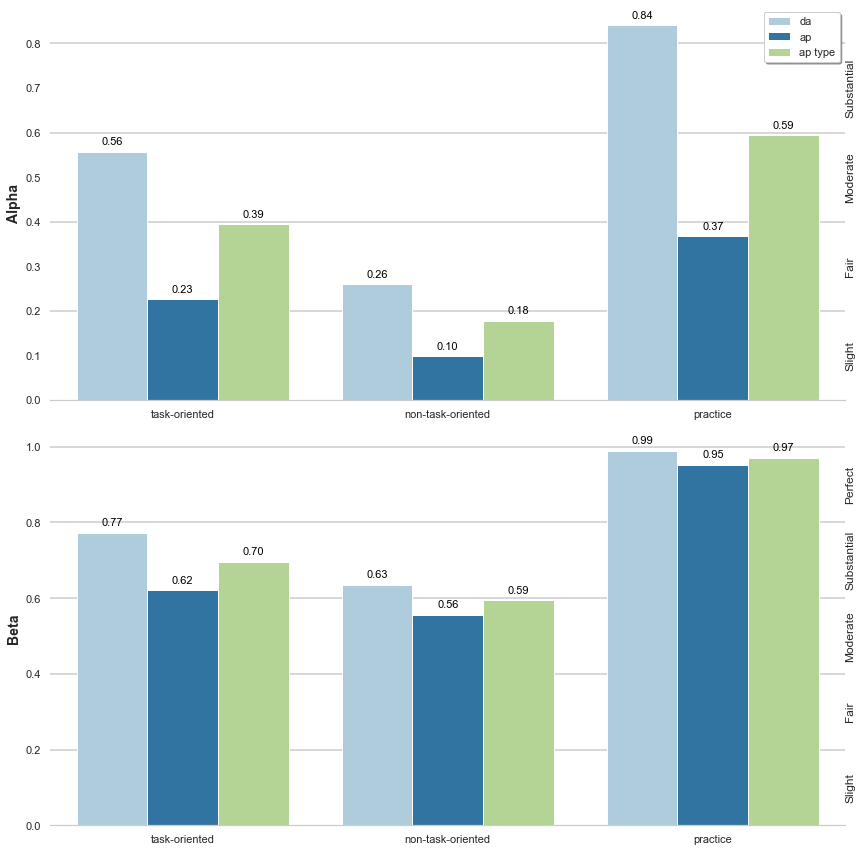

In [4]:
# Generate agreement values for each coefficient/dialogue type
type_frame, type_fig = generate_group_agreement_data(user_label_data, dialogue_type_groups + ['practice_dialogue'], labels, 'Dialogue Type Agreement', agreement_data_dir, save=False, show=False)
type_frame

### Task/non-task Stats

In [5]:
# Generate stats for each coefficient/dialogue type
type_stat_frame, basic_type_stat_frame = generate_dialogue_type_agreement_statistics('Dialogue Type Agreement Statistics', agreement_data_dir, save=False, show=False)
type_stat_frame

Alpha                                                                          Beta                                                                   
  label_type t-statistic   p-value   cohen-d   n      exp_n     power exp_power label_type t-statistic   p-value   cohen-d   n      exp_n     power exp_power
0         da    3.499495  0.002560  1.565022  10   7.502652  0.911098       0.8         da    3.335372  0.003682  1.491624  10   8.137597  0.883550       0.8
1         ap    1.926165  0.070026  0.861407  10  22.157948  0.445705       0.8         ap    2.043209  0.055953  0.913751  10  19.808830  0.489622       0.8
2    ap type    3.213741  0.004815  1.437229  10   8.673589  0.859551       0.8    ap type    3.150423  0.005533  1.408912  10   8.977964  0.845809       0.8
3        all    4.320277  0.000062  1.115491  30  13.645948  0.988924       0.8        all    4.297046  0.000067  1.109493  30  13.781988  0.988241       0.8

## Corpora Agreement

group     Alpha                          Beta                    
                             da        ap   ap type        da        ap   ap type
test 28         kvret  0.802084  0.318182  0.555914  0.896084  0.652893  0.770496
test 52         kvret  0.370974  0.178571  0.279948  0.681300  0.590909  0.638156
test 96         kvret  0.595147  0.222826  0.410409  0.800023  0.606061  0.705012
test 129        kvret  0.830042  0.339806  0.581529  0.913304  0.703704  0.800355
test 102        kvret  0.851193  0.611765  0.731258  0.919106  0.789474  0.854090
mean            kvret  0.689888  0.334230  0.511812  0.841963  0.668608  0.753622
task1 test 290   babl  0.459638  0.057971  0.270529  0.728098  0.526042  0.632942
task1 test 428   babl  0.604903  0.010989  0.322478  0.794510  0.540146  0.666431
task1 test 555   babl  0.183561  0.012270  0.096574  0.585153  0.554264  0.568601
task1 test 564   babl  0.407588  0.152866  0.281143  0.688921  0.577778  0.632288
task1 test 894   babl  0.457207  0.350000  0.407518  0.711457  0.661458  0.688052
mean             babl  0.422579  0.116819  0.275648  0.701628  0.571937  0.637663
jason-mammoth   scose  0.218345  0.143294  0.183132  0.610514  0.585153  0.598442
jason-clone     scose  0.056846 -0.018429  0.021640  0.543336  0.507772  0.526677
jason-accident  scose  0.387984  0.050086  0.201280  0.709448  0.565375  0.628516
lynne-hunter    scose  0.268430 -0.007827  0.122841  0.639293  0.501718  0.566887
lynne-tipsy     scose  0.499457  0.201524  0.342842  0.743147  0.612845  0.672838
mean            scose  0.286212  0.073730  0.174347  0.649148  0.554573  0.598672
KB7RE015        cabnc  0.415212  0.109208  0.267018  0.693881  0.536232  0.617337
KBKRE03G        cabnc  0.295027  0.100962  0.200917  0.638889  0.531915  0.587445
KDARE00G        cabnc  0.038109  0.033784  0.035967  0.556463  0.490196  0.525276
KE2RE00Y        cabnc  0.276446  0.290323  0.284226  0.627327  0.680000  0.657820
KBERE00G        cabnc  0.139813  0.076389  0.107812  0.581598  0.541063  0.561358
mean            cabnc  0.232921  0.122133  0.179188  0.619631  0.555881  0.589847

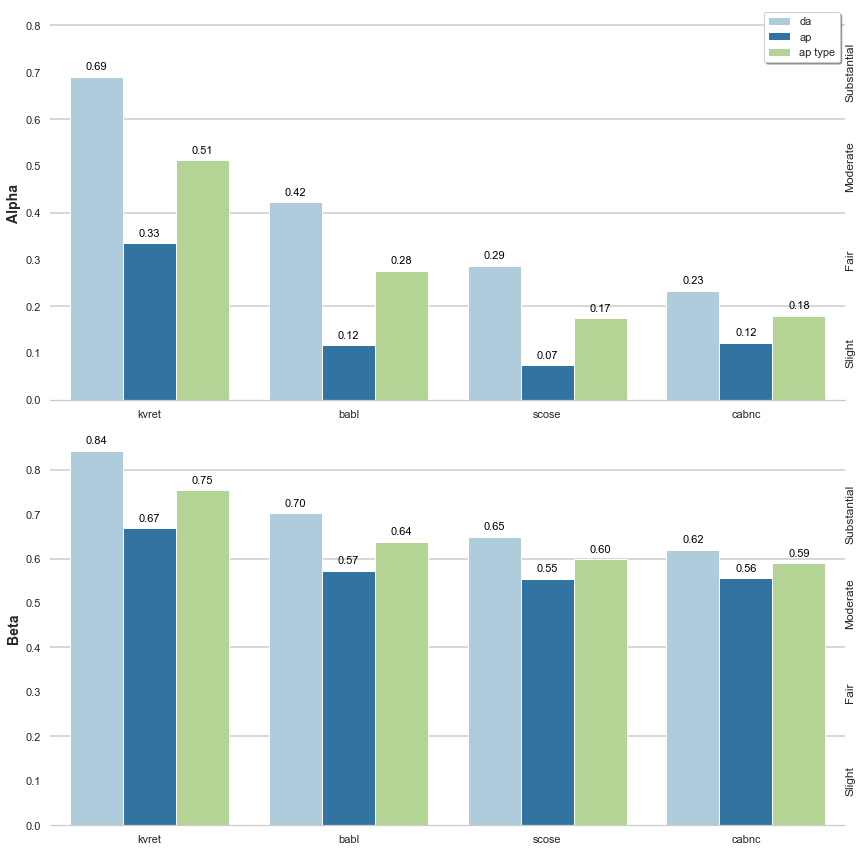

In [6]:
# Generate agreement values for each coefficient/dialogue corpora
corpora_frame, corpora_fig = generate_group_agreement_data(user_label_data, dialogue_corpora_groups, labels, 'Dialogue Corpora Agreement', agreement_data_dir, save=False, show=False)
corpora_frame

### Corpora Stats

In [7]:
# Generate stats for each coefficient/dialogue corpora
corpora_stat_frame, basic_corpora_stat_frame = generate_corpora_agreement_statistics('Dialogue Corpora Agreement Statistics', agreement_data_dir, save=False, show=False)
corpora_stat_frame

Alpha DA                                                                                                                     Alpha AP                                                                                                                     Alpha AP type                                                                                                                     Alpha All                                                                                                                    Beta DA                                                                                                                     Beta AP                                                                                                                     Beta AP type                                                                                                                     Beta All                                                                                                                   
    group1 group2 meandiff   p-value   lower   upper reject    eta_sq  omega_sq   cohen_f     n      exp_n     power exp_power   group1 group2 meandiff   p-value   lower   upper reject    eta_sq  omega_sq   cohen_f     n      exp_n     power exp_power        group1 group2 meandiff   p-value   lower   upper reject    eta_sq  omega_sq   cohen_f     n      exp_n     power exp_power    group1 group2 meandiff   p-value   lower   upper reject    eta_sq omega_sq   cohen_f     n      exp_n     power exp_power  group1 group2 meandiff   p-value   lower   upper reject    eta_sq  omega_sq   cohen_f     n      exp_n     power exp_power  group1 group2 meandiff   p-value   lower   upper reject    eta_sq  omega_sq   cohen_f     n      exp_n     power exp_power       group1 group2 meandiff   p-value   lower   upper reject    eta_sq  omega_sq   cohen_f     n      exp_n     power exp_power   group1 group2 meandiff   p-value   lower   upper reject    eta_sq  omega_sq   cohen_f     n     exp_n     power exp_power
0     babl  cabnc  -0.1897  0.324300 -0.4968  0.1175  False       NaN       NaN       NaN   NaN        NaN       NaN       NaN     babl  cabnc   0.0053  0.900000 -0.2302  0.2408  False       NaN       NaN       NaN   NaN        NaN       NaN       NaN          babl  cabnc  -0.0965  0.638600 -0.3318  0.1389  False       NaN       NaN       NaN   NaN        NaN       NaN       NaN      babl  cabnc  -0.0936  0.461700 -0.2619  0.0747  False       NaN      NaN       NaN   NaN        NaN       NaN       NaN    babl  cabnc  -0.0820  0.392200 -0.2260  0.0620  False       NaN       NaN       NaN   NaN        NaN       NaN       NaN    babl  cabnc  -0.0161  0.900000 -0.1339  0.1018  False       NaN       NaN       NaN   NaN        NaN       NaN       NaN         babl  cabnc  -0.0478  0.601800 -0.1581  0.0624  False       NaN       NaN       NaN   NaN        NaN       NaN       NaN     babl  cabnc  -0.0486  0.376800 -0.1281  0.0309  False       NaN       NaN       NaN   NaN       NaN       NaN       NaN
1     babl  kvret   0.2673  0.099900 -0.0399  0.5745  False       NaN       NaN       NaN   NaN        NaN       NaN       NaN     babl  kvret   0.2174  0.075700 -0.0181  0.4529  False       NaN       NaN       NaN   NaN        NaN       NaN       NaN          babl  kvret   0.2362  0.049100  0.0008  0.4715   True       NaN       NaN       NaN   NaN        NaN       NaN       NaN      babl  kvret   0.2403  0.002100  0.0720  0.4086   True       NaN      NaN       NaN   NaN        NaN       NaN       NaN    babl  kvret   0.1403  0.057500 -0.0037  0.2843  False       NaN       NaN       NaN   NaN        NaN       NaN       NaN    babl  kvret   0.0967  0.128500 -0.0212  0.2145  False       NaN       NaN       NaN   NaN        NaN       NaN       NaN         babl  kvret   0.1160  0.037600  0.0057  0.2262   True       NaN       NaN       NaN   NaN        NaN       NaN       NaN     babl  kvret   0.1177  0.001400  0.0382  0.1971   True       NaN       NaN       NaN   NaN 

## AP Label Agreement (suffix-only)

Alpha                                                                             Beta                                                                   
  label_type t-statistic       p-value   cohen-d   n     exp_n     power exp_power label_type t-statistic   p-value   cohen-d   n      exp_n     power exp_power
0         da    3.499495  2.559594e-03  1.565022  10  7.502652  0.911098       0.8         da    3.335372  0.003682  1.491624  10   8.137597  0.883550       0.8
1         ap    3.467029  2.750845e-03  1.550503  10  7.620983  0.906074       0.8         ap    2.933637  0.008876  1.311962  10  10.176076  0.792247       0.8
2    ap type    4.188328  5.523577e-04  1.873077  10  5.618257  0.977032       0.8    ap type    3.795493  0.001325  1.697396  10   6.563149  0.948056       0.8
3        all    5.602278  6.106380e-07  1.446502  30  8.577841  0.999806       0.8        all    5.144016  0.000003  1.328179  30   9.956987  0.999023       0.8

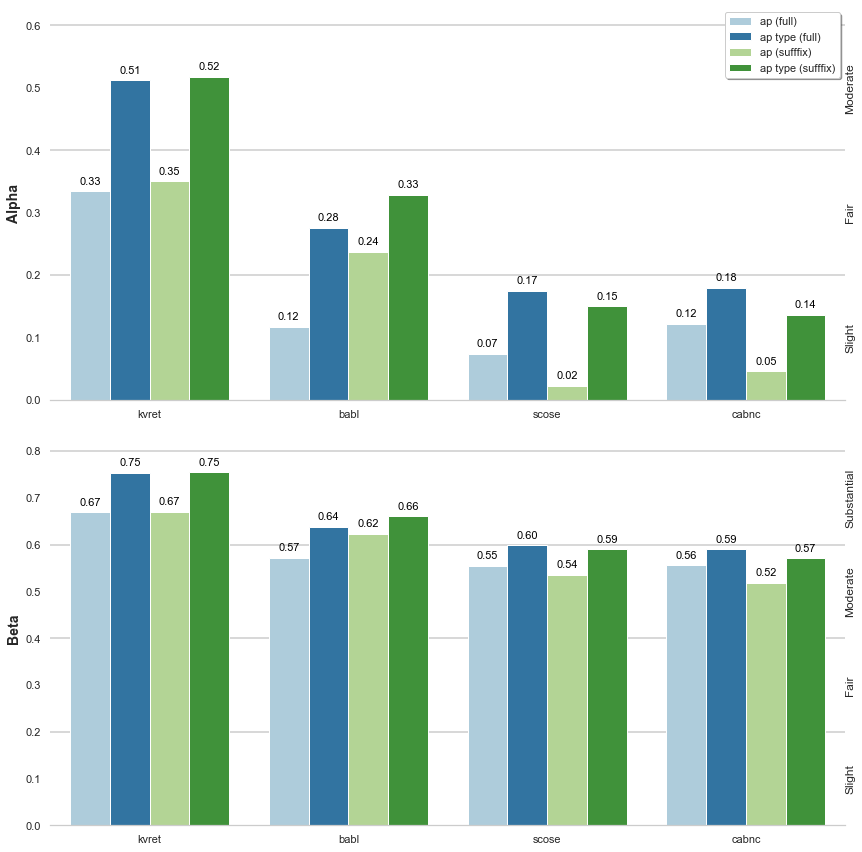

In [8]:
# Generate agreement values plot for each coefficient/dialogue corpora (post-fix)
post_fix_corpora_fig = generate_postfix_only_plot(agreement_data_dir,  save=True, show=False)

# Generate stats for each coefficient/dialogue type (post-fix)
post_fix_stat_frame, basic_post_fix_stat_frame = generate_dialogue_type_agreement_statistics('Dialogue Type Agreement Statistics', post_fix_agreement_data_dir, save=False, show=False)
post_fix_stat_frame

## Alpha vs Beta

c:\python\virtual environments\venv-tf-1.15\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


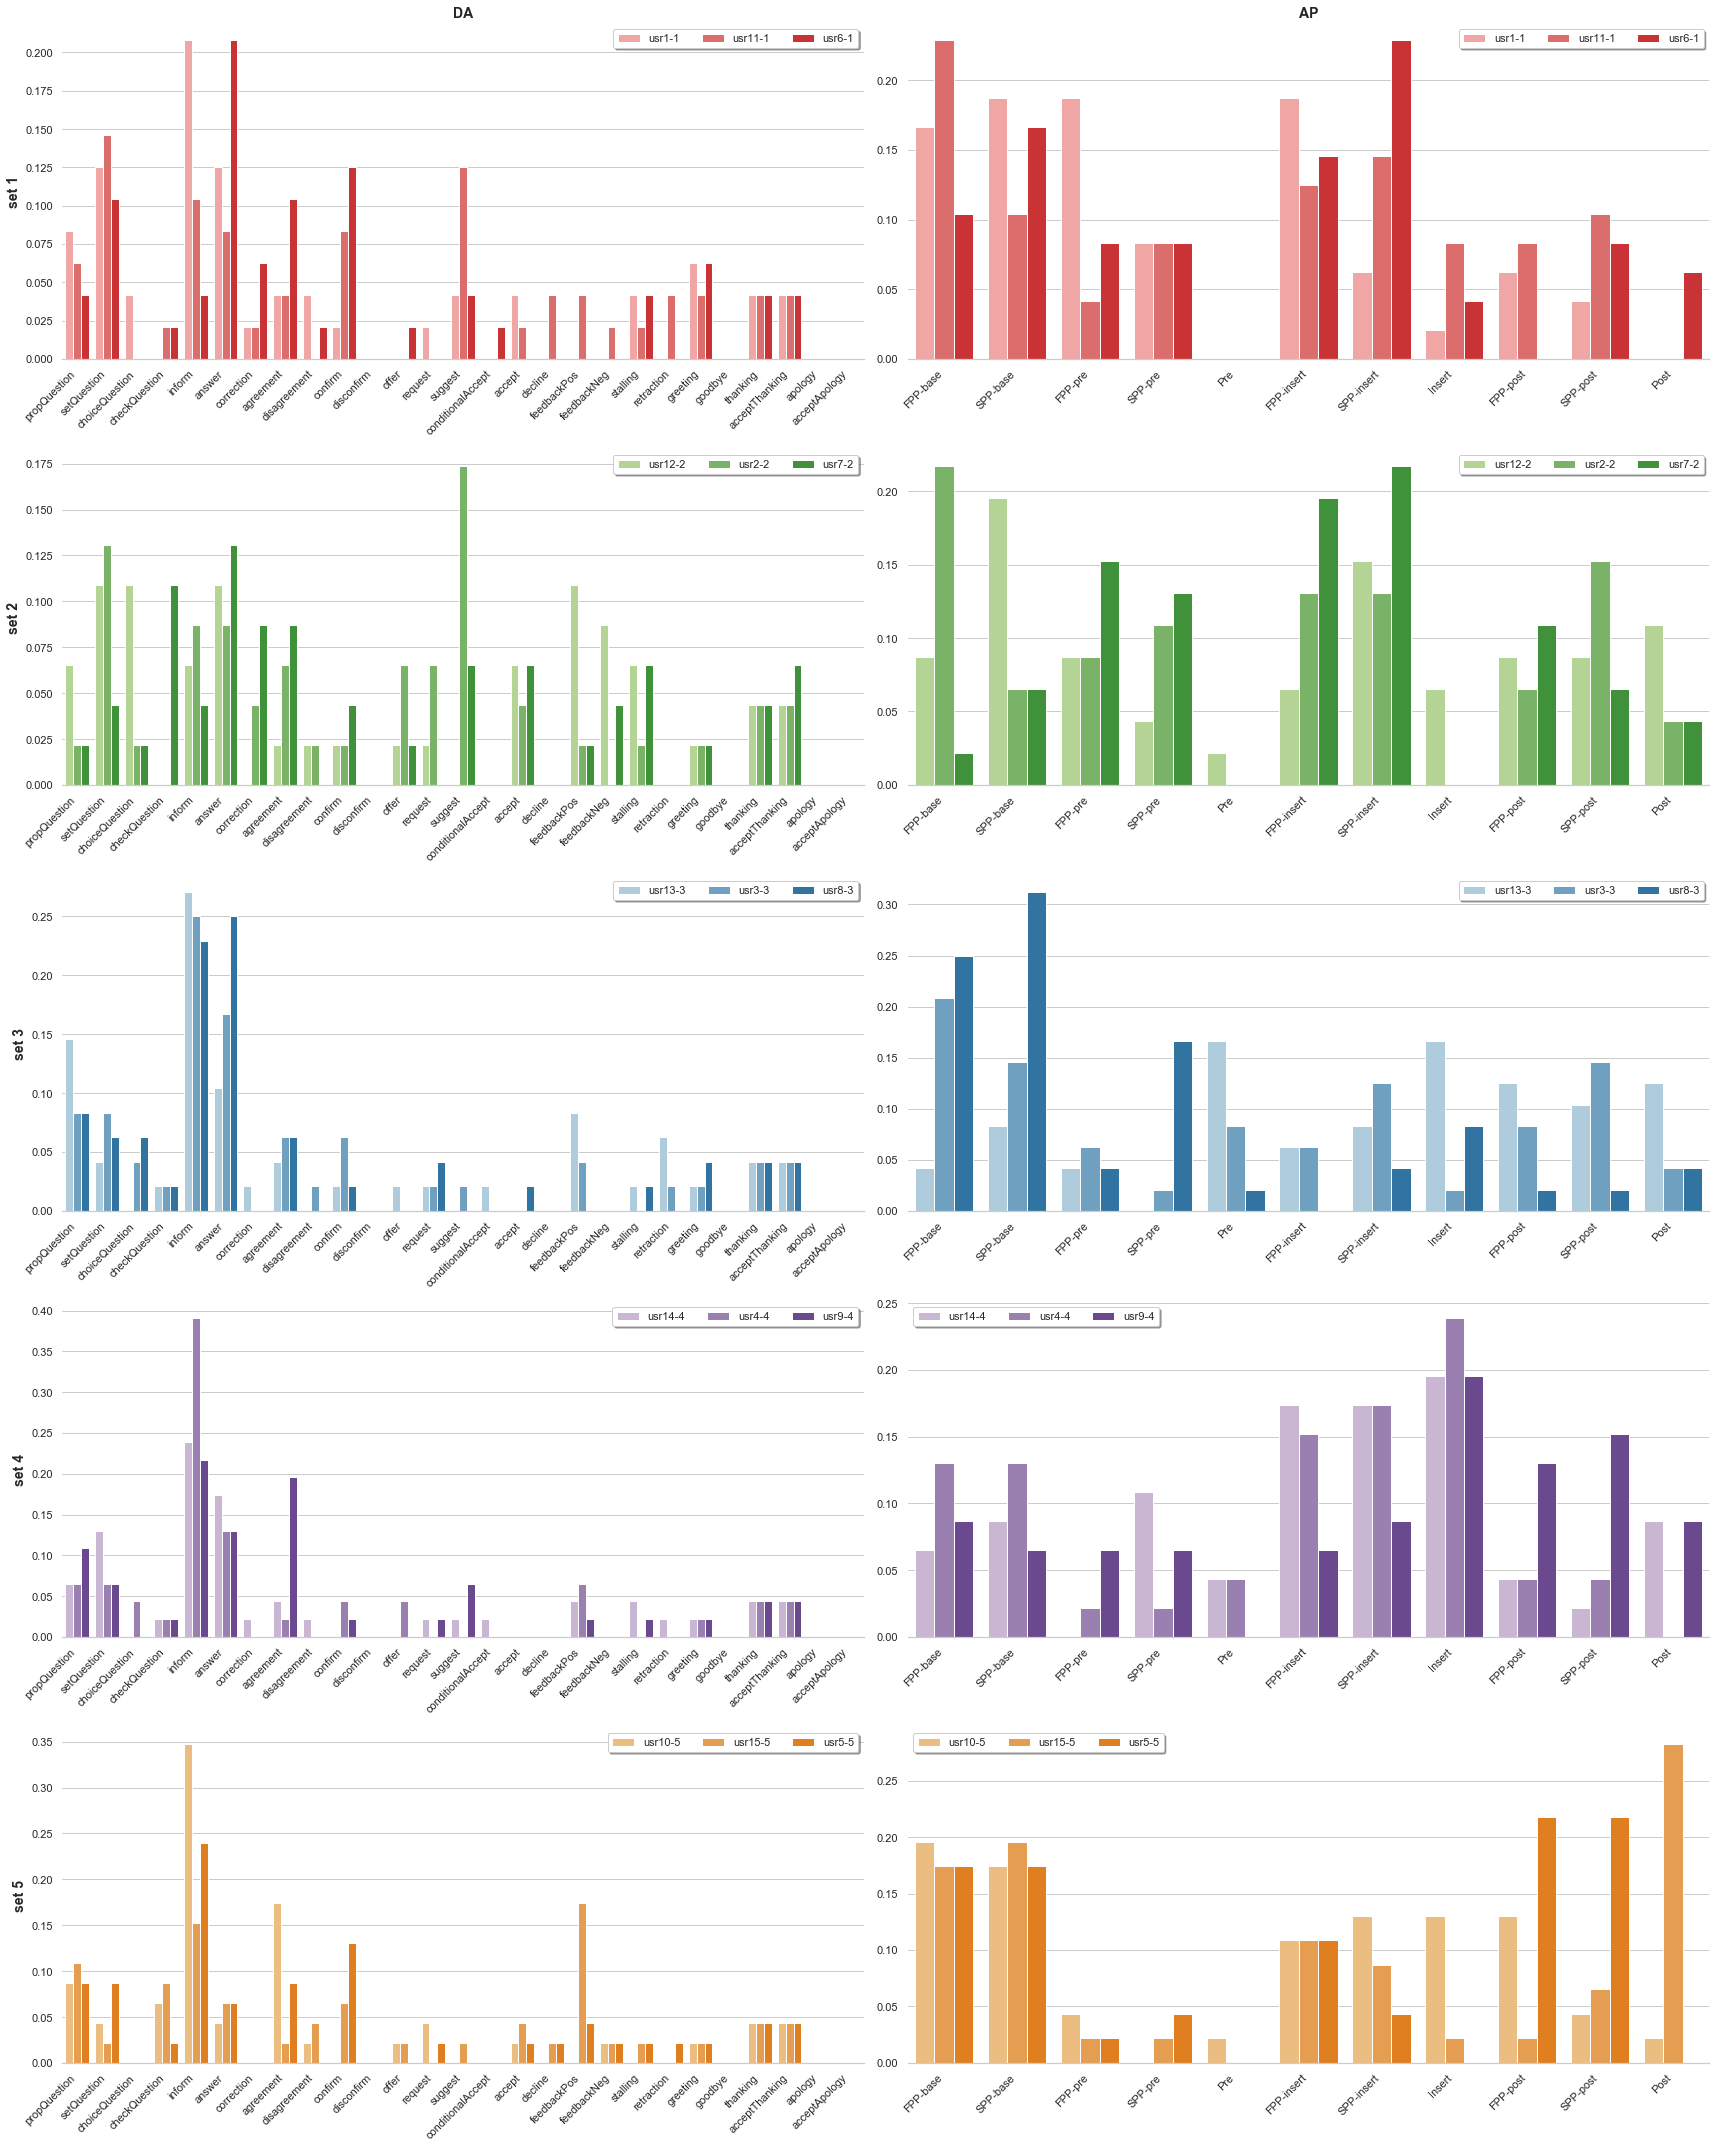

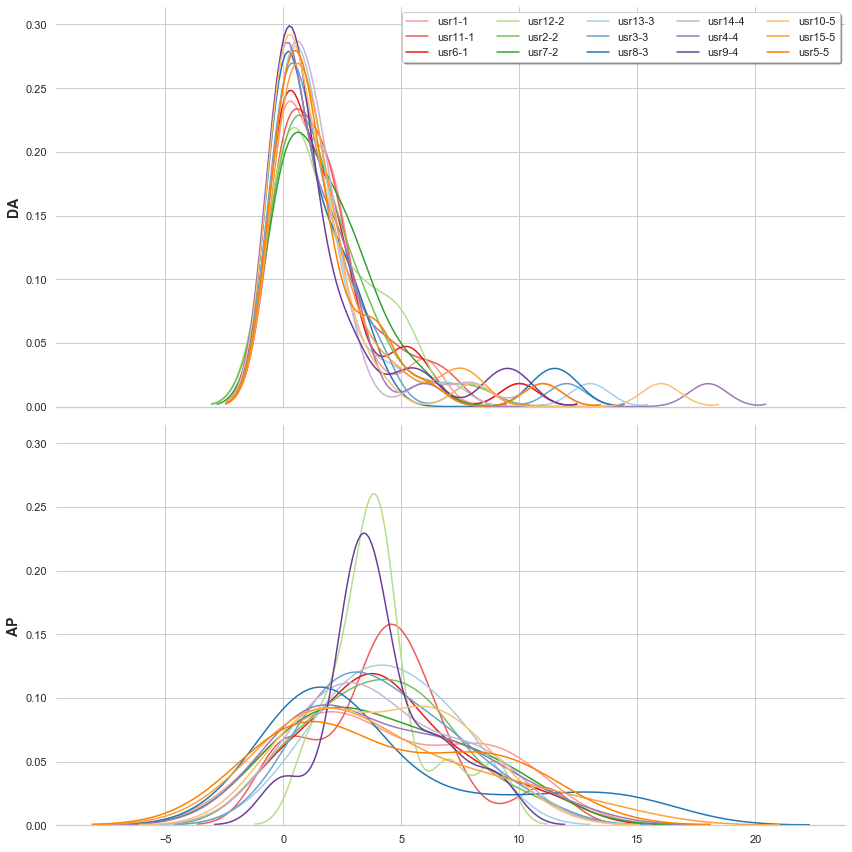

In [9]:
# Generate user label distribution stats and plots
_, chi_frame, js_frame, bar_plt, dist_fig = generate_user_label_distributions(user_label_data['sets_labels'], sets_list, labels, 'User', distr_data_dir, save=False, show=False)


### Jensen-shannon Divergence

In [10]:
js_frame

,Group,DA JS,AP JS
0,set 1,0.271857,0.150061
1,set 2,0.304962,0.177103
2,set 3,0.183142,0.307181
3,set 4,0.232197,0.170252
4,set 5,0.260464,0.295831
mean,NaN,0.250524,0.220086
std,NaN,0.040972,0.067167


### Chi-squared

In [11]:
chi_frame

Group   User 1   User 2  DA                                         AP                                       
                            dof   critical        chi   p-value reject dof   critical        chi   p-value reject
0   set 1   usr1-1  usr11-1  20  31.410433  19.953114  0.460866  False   8  15.507313  11.499658  0.174962  False
1   set 1   usr1-1   usr6-1  18  28.869299  21.281385  0.265455  False   9  16.918978  14.495637  0.105755  False
2   set 1  usr11-1   usr6-1  20  31.410433  20.609524  0.420427  False   9  16.918978  12.352564  0.194155  False
3   set 2  usr12-2   usr2-2  18  28.869299  24.878211  0.128308  False  10  18.307038  14.180819  0.164903  False
4   set 2  usr12-2   usr7-2  19  30.143527  24.909957  0.163528  False  10  18.307038  16.687276  0.081577  False
5   set 2   usr2-2   usr7-2  19  30.143527  19.882251  0.401695  False   8  15.507313  11.972727  0.152425  False
6   set 3  usr13-3   usr3-3  19  30.143527  13.083823  0.834252  False  10  18.307038  17.262626  0.068751  False
7   set 3  usr13-3   usr8-3  18  28.869299  18.933868  0.395906  False  10  18.307038  40.193818  0.000016   True
8   set 3   usr3-3   usr8-3  17  27.587112   9.853002  0.909661  False  10  18.307038  23.635354  0.008629   True
9   set 4  usr14-4   usr4-4  19  30.143527  17.508703  0.555446  False  10  18.307038   9.666667  0.470208  False
10  set 4  usr14-4   usr9-4  17  27.587112  12.954545  0.739224  False  10  18.307038  15.891775  0.102773  False
11  set 4   usr4-4   usr9-4  15  24.995790  19.519048  0.191169  False  10  18.307038  17.311111  0.067757  False
12  set 5  usr10-5  usr15-5  18  28.869299  26.420152  0.090532  False  10  18.307038  20.479552  0.025030   True
13  set 5  usr10-5   usr5-5  18  28.869299  17.459259  0.491771  False  10  18.307038  18.725490  0.043891   True
14  set 5  usr15-5   usr5-5  19  30.143527  17.333333  0.567296  False   9  16.918978  26.191691  0.001901   True

# Annotation Confidence Scores

kvret                      babl                     scose                     cabnc                    
label_type    da    ap ap type   all    da    ap ap type   all    da    ap ap type   all    da    ap ap type   all
min         3.00  3.00    3.00  3.00  3.00  3.00    3.00  3.00  2.00  2.00    2.00  2.00  3.00  3.00    3.00  3.00
max         7.00  7.00    6.00  7.00  6.00  6.00    6.00  6.00  7.00  5.00    5.00  7.00  5.00  5.00    5.00  5.00
mean        5.07  5.27    4.87  5.07  4.53  4.13    4.53  4.40  4.00  3.93    3.67  3.87  4.13  4.00    3.80  3.98
std         1.03  1.10    0.99  1.03  0.99  0.99    0.92  0.96  1.31  1.16    0.98  1.14  0.64  0.85    0.68  0.72

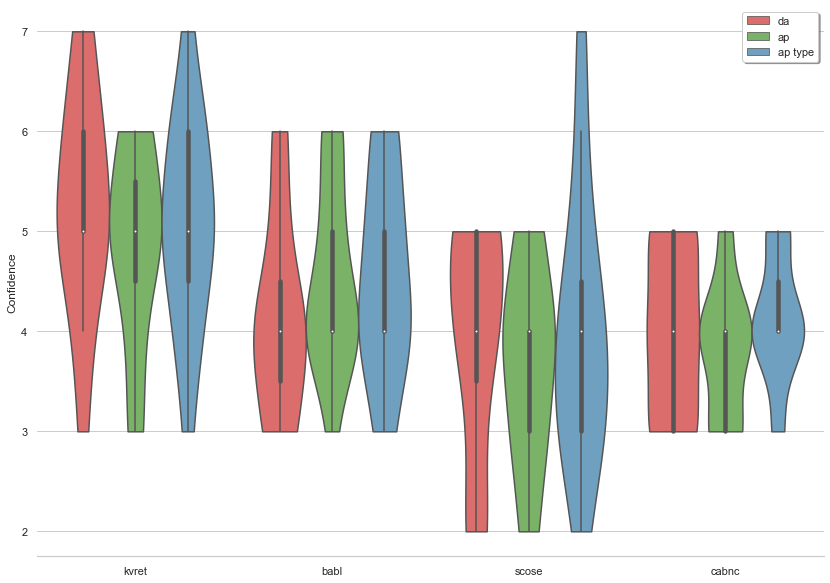

In [12]:
_, score_fig = generate_group_rating_data(user_rating_data, dialogue_corpora_groups, 'Dialogue Corpora Confidence Scores', rating_data_dir, save=False, show=False)
score_stats, basic_score_stats = generate_corpora_rating_statistics(user_rating_data, dialogue_corpora_groups, 'Dialogue Corpora Rating Statistics', rating_data_dir, save=False, show=False)
basic_score_stats.round(2)

In [13]:
score_stats

DA                                                                                                                         AP                                                                                                                    AP type                                                                                                                       All                                                                                                                        
  group1 group2 meandiff   p-value   lower   upper reject    eta_sq  omega_sq   cohen_f     n      exp_n     power exp_power group1 group2 meandiff   p-value   lower   upper reject   eta_sq  omega_sq   cohen_f     n      exp_n     power exp_power  group1 group2 meandiff   p-value   lower   upper reject    eta_sq  omega_sq  cohen_f     n      exp_n     power exp_power group1 group2 meandiff       p-value   lower   upper reject   eta_sq  omega_sq   cohen_f      n      exp_n     power exp_power
0   babl  cabnc  -0.4000  0.685500 -1.3874  0.5874  False       NaN       NaN       NaN   NaN        NaN       NaN       NaN   babl  cabnc  -0.1333  0.900000 -1.1308  0.8642  False      NaN       NaN       NaN   NaN        NaN       NaN       NaN    babl  cabnc  -0.7333  0.126100 -1.6020  0.1354  False       NaN       NaN      NaN   NaN        NaN       NaN       NaN   babl  cabnc  -0.4222  1.736000e-01 -0.9561  0.1117  False      NaN       NaN       NaN    NaN        NaN       NaN       NaN
1   babl  kvret   0.5333  0.486700 -0.4541  1.5207  False       NaN       NaN       NaN   NaN        NaN       NaN       NaN   babl  kvret   1.1333  0.019900  0.1358  2.1308   True      NaN       NaN       NaN   NaN        NaN       NaN       NaN    babl  kvret   0.3333  0.716900 -0.5354  1.2020  False       NaN       NaN      NaN   NaN        NaN       NaN       NaN   babl  kvret   0.6667  7.800000e-03  0.1328  1.2006   True      NaN       NaN       NaN    NaN        NaN       NaN       NaN
2   babl  scose  -0.5333  0.486700 -1.5207  0.4541  False       NaN       NaN       NaN   NaN        NaN       NaN       NaN   babl  scose  -0.2000  0.900000 -1.1975  0.7975  False      NaN       NaN       NaN   NaN        NaN       NaN       NaN    babl  scose  -0.8667  0.050700 -1.7354  0.0020  False       NaN       NaN      NaN   NaN        NaN       NaN       NaN   babl  scose  -0.5333  5.040000e-02 -1.0672  0.0006  False      NaN       NaN       NaN    NaN        NaN       NaN       NaN
3  cabnc  kvret   0.9333  0.070500 -0.0541  1.9207  False       NaN       NaN       NaN   NaN        NaN       NaN       NaN  cabnc  kvret   1.2667  0.007400  0.2692  2.2642   True      NaN       NaN       NaN   NaN        NaN       NaN       NaN   cabnc  kvret   1.0667  0.010200  0.1980  1.9354   True       NaN       NaN      NaN   NaN        NaN       NaN       NaN  cabnc  kvret   1.0889  1.000000e-03  0.5550  1.6228   True      NaN       NaN       NaN    NaN        NaN       NaN       NaN
4  cabnc  scose  -0.1333  0.900000 -1.1207  0.8541  False       NaN       NaN       NaN   NaN        NaN       NaN       NaN  cabnc  scose  -0.0667  0.900000 -1.0642  0.9308  False      NaN       NaN       NaN   NaN        NaN       NaN       NaN   cabnc  scose  -0.1333  0.900000 -1.0020  0.7354  False       NaN       NaN      NaN   NaN        NaN       NaN       NaN  cabnc  scose  -0.1111  9.000000e-01 -0.6450  0.4228  False      NaN       NaN       NaN    NaN        NaN       NaN       NaN
5  kvret  scose  -1.0667  0.029400 -2.0541 -0.0793   True       NaN       NaN       NaN   NaN        NaN       NaN       NaN  kvret  scose  -1.3333  0.004400 -2.3308 -0.3358   True      NaN       NaN       NaN   NaN        NaN       NaN       NaN   kvret  scose  -1.2000  0.003100 -2.0687 -0.3313   True       NaN       NaN      NaN   NaN        NaN       NaN       NaN  kvret  scose  -1.2000  1.000000e-03 -1.7339 -0.6661   True      NaN       NaN       NaN    NaN        NaN       NaN       NaN
6    NaN    NaN      NaN  0.02

# Annotation Time

In [14]:
timing_stats, basic_timing_stats = generate_corpora_timing_statistics(user_timing_data, dialogue_corpora_groups, 'Dialogue Corpora Timing Statistics', timing_data_dir, save=False, show=False)
basic_timing_stats.round(2)

group,kvret,babl,scose,cabnc
min,10.55,10.71,9.90,11.52
max,42.28,89.06,47.32,95.76
mean,24.62,33.57,25.56,36.69
std,8.94,19.05,11.09,24.16


,min,max,mean,std
Practice,37.75,117.87,77.89,27.52
Dialogue 1,21.02,89.06,43.85,20.48
Dialogue 2,10.55,95.76,37.42,24.85
Dialogue 3,9.90,46.17,23.62,11.08
Dialogue 4,10.71,30.20,19.81,6.03


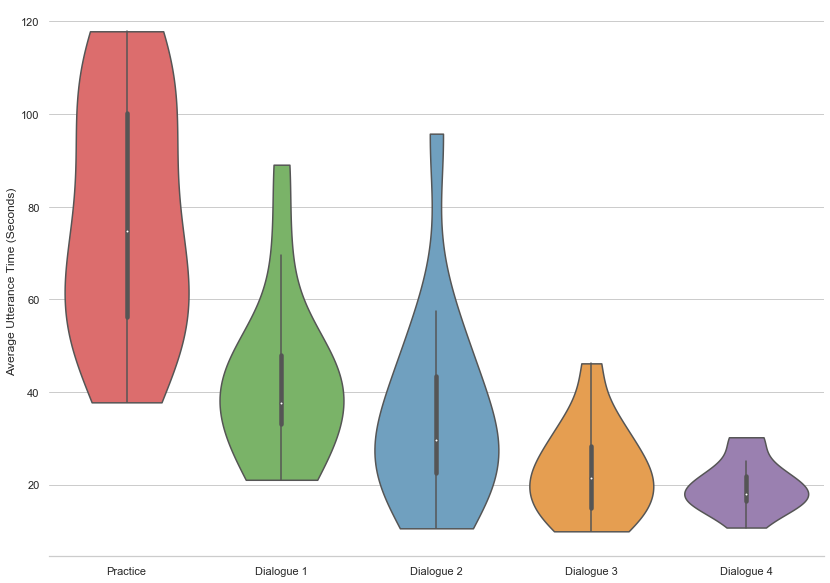

In [15]:
timing_frame, timing_fig = generate_ordered_time_data(user_timing_data['ordered_times'], 'Ordered Dialogue Times', timing_data_dir, save=False, show=False)
timing_frame = timing_frame[['min', 'max', 'mean', 'std']]
timing_frame.round(2)

# User-pair Assignments

In [24]:
# corpus = 'cabnc_dialogues'
# dialogue = 'KBERE00G'
# users = ['usr10-5', 'usr5-5']

corpus = 'kvret_dialogues'
dialogue = 'test_102'
users = ['usr10-5', 'usr5-5']

# Get the dialogue data and remove unneeded users
dialogue_data = {dialogue: user_label_data[corpus][dialogue]}
excluded_users = [u for u in dialogue_data[dialogue].keys() if u not in users]
for usr in excluded_users:
    del dialogue_data[dialogue][usr]

# Calculate Alpha and Beta
alpha_r = get_weighted_agreement(dialogue_data, labels, 'alpha', add_mean=False, postfix_only=False)
print(alpha_r)
beta_r = get_weighted_agreement(dialogue_data, labels, 'beta', add_mean=False, postfix_only=False)
print(beta_r)

             alpha               
                da   ap   ap type
test 102  0.787654  0.8  0.793665
              beta                   
                da        ap  ap type
test 102  0.764464  0.777778  0.77094


# User Assigned Labels

In [17]:
# Load pickle
usr_assignments = load_pickle(os.path.join(agreement_data_dir, 'user_label_assignments.pkl'))

print('Practice')
print(usr_assignments['practice'])
print()

# for group in dialogue_corpora_groups:
#     print(group)
#     for dialogue in dialogue_groups[group]:
#         print(usr_assignments[dialogue])
#         print()

Practice
   dialogue speaker                                        text                   usr1-1                 usr10-5                  usr11-1                  usr12-2                  usr13-3               usr14-4                 usr15-5                   usr2-2                   usr3-3                   usr4-4                   usr5-5                   usr6-1                   usr7-2                   usr8-3                   usr9-4
0  practice     USR               is it going to snow this week    FPP-base propQuestion   FPP-base propQuestion    FPP-base propQuestion    SPP-base propQuestion          FPP-post inform  SPP-pre propQuestion   FPP-base propQuestion    FPP-base propQuestion    FPP-base propQuestion    FPP-base propQuestion    FPP-base propQuestion    FPP-base propQuestion          FPP-post answer    FPP-base propQuestion    FPP-base propQuestion
1  practice     SYS              Where should I check for snow?     FPP-base setQuestion  FPP-insert setQuestion   FPP-inse

In [18]:
for dialogue in dialogue_groups['kvret_dialogues']:
    print(usr_assignments[dialogue])
    print()

  dialogue speaker                                                 text                   usr1-1                  usr11-1                    usr6-1
0  test_28     USR   what's the weather forecast for today and tomorrow    FPP-base propQuestion     FPP-base setQuestion      FPP-base setQuestion
1  test_28     SYS                     In what city are you interested?     FPP-base setQuestion   SPP-insert setQuestion  FPP-insert checkQuestion
2  test_28     USR                                          Los Angeles          SPP-base answer        FPP-insert answer         SPP-insert answer
3  test_28     SYS  In Los Angeles, it will rain today and be 40-60F.          FPP-insert inform          SPP-base inform           SPP-base answer
4  test_28     SYS                Tomorrow, it will be warm and 60-80F.        FPP-insert inform          SPP-base inform           SPP-base answer
5  test_28     USR                                              Thanks.        FPP-post thanking        FPP-post

In [19]:
for dialogue in dialogue_groups['babl_dialogues']:
    print(usr_assignments[dialogue])
    print()

         dialogue speaker                                                                                    text                usr1-1                 usr11-1                      usr6-1
0  task1_test_290     USR                                                                            good morning      FPP-pre greeting       FPP-base greeting           FPP-base greeting
1  task1_test_290     SYS                                                    hello what can i help you with today      FPP-pre greeting  SPP-insert setQuestion               FPP-pre offer
2  task1_test_290     USR  i'd like to book a table with spanish cuisine for two people in a moderate price range      SPP-base request       FPP-insert answer             SPP-base answer
3  task1_test_290     SYS                                                                               i'm on it         Insert accept      SPP-insert confirm            SPP-pre stalling
4  task1_test_290     SYS                                   

In [20]:
for dialogue in dialogue_groups['cabnc_dialogues']:
    print(usr_assignments[dialogue])
    print()

   dialogue speaker                                                                                                                                                                                                         text                     usr1-1                usr11-1                  usr6-1
0  KB7RE015   PS02H                                                                                                                                                                                                     Hey Ann.           FPP-pre greeting      FPP-base greeting       FPP-base greeting
1  KB7RE015   PS02G                                                                                                                                                                                                        What.             SPP-pre answer    SPP-pre feedbackNeg       SPP-base greeting
2  KB7RE015   PS02H                                                                                    

In [21]:
for dialogue in dialogue_groups['scose_dialogues']:
    print(usr_assignments[dialogue])
    print()


         dialogue speaker                                                                                       text                 usr1-1                 usr11-1                   usr6-1
0   jason-mammoth     ERI  didn't they, didn't you ever hear that they, they found an entire woolly mammoth, frozen.    FPP-pre setQuestion  FPP-base checkQuestion          FPP-base inform
1   jason-mammoth     JAC                                                                     yeah, and they ate it.         SPP-pre inform      SPP-base agreement       SPP-base agreement
2   jason-mammoth     ERI                                                                      an entire one though.         FPP-pre inform   FPP-insert correction       SPP-insert confirm
3   jason-mammoth     JAC                                                                                      yeah.         SPP-pre accept      SPP-insert confirm       SPP-insert confirm
4   jason-mammoth     ERI                              